In [1]:
# Initialize Context - this is where you'd setup information about your Hadoop cluster if you had one!
from pyspark.sql import SparkSession


spark = SparkSession.builder.appName("Covid").getOrCreate()

sc = spark.sparkContext

sc.setLogLevel("WARN")

25/03/01 13:58:57 WARN Utils: Your hostname, McKays-Macbook-Pro.local resolves to a loopback address: 127.0.0.1; using 10.54.2.60 instead (on interface en0)
25/03/01 13:58:57 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/03/01 13:58:58 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


25/03/01 13:59:13 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


In [2]:
# Write code to define or infer the schema and then read in the dataset
# Read the file into a Spark DataFrame
usCountiesFilePath = "./uscounties.csv"

df = spark.read.csv(usCountiesFilePath, inferSchema=True, header=True)

df.show()

+----------+-----------+----------+-----+-----+------+
|      date|     county|     state| fips|cases|deaths|
+----------+-----------+----------+-----+-----+------+
|2020-01-21|  Snohomish|Washington|53061|    1|     0|
|2020-01-22|  Snohomish|Washington|53061|    1|     0|
|2020-01-23|  Snohomish|Washington|53061|    1|     0|
|2020-01-24|       Cook|  Illinois|17031|    1|     0|
|2020-01-24|  Snohomish|Washington|53061|    1|     0|
|2020-01-25|     Orange|California| 6059|    1|     0|
|2020-01-25|       Cook|  Illinois|17031|    1|     0|
|2020-01-25|  Snohomish|Washington|53061|    1|     0|
|2020-01-26|   Maricopa|   Arizona| 4013|    1|     0|
|2020-01-26|Los Angeles|California| 6037|    1|     0|
|2020-01-26|     Orange|California| 6059|    1|     0|
|2020-01-26|       Cook|  Illinois|17031|    1|     0|
|2020-01-26|  Snohomish|Washington|53061|    1|     0|
|2020-01-27|   Maricopa|   Arizona| 4013|    1|     0|
|2020-01-27|Los Angeles|California| 6037|    1|     0|
|2020-01-2

In [3]:
# Write code to find the county with the most deaths
# Option 1) SparkSQL API
df.createOrReplaceTempView("covid")  # create table that you can do sql on

print("Max deaths:")
spark.sql(
    """
    select county, state, deaths
    from covid
    order by deaths desc
    limit 1
  """
).show()

Max deaths:


+-------------+--------+------+
|       county|   state|deaths|
+-------------+--------+------+
|New York City|New York| 40267|
+-------------+--------+------+



In [4]:
# Option 2) # DataFrame style
from pyspark.sql.functions import col

print("Max deaths:")
print(
    df.orderBy(col("deaths").desc()).take(  # .where(col("county") == "New York City") \
        1
    )
)

Max deaths:


[Row(date=datetime.date(2022, 5, 13), county='New York City', state='New York', fips=None, cases=2422658, deaths=40267)]


In [5]:
# # Option 3) RDD MapReduce Style without key
rows = df.rdd


def getMax(cumm, other):
    if other["deaths"] is not None and other["deaths"] > cumm["deaths"]:
        return other
    else:
        return cumm


print("Max deaths:")
print(rows.reduce(getMax))

Max deaths:


25/03/01 14:47:36 ERROR Executor: Exception in task 7.0 in stage 5.0 (TID 33) 8]
org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/Users/mckaysnell/BYU-CS/CS-452/SparkSQL/venv/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 1247, in main
    process()
  File "/Users/mckaysnell/BYU-CS/CS-452/SparkSQL/venv/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 1239, in process
    serializer.dump_stream(out_iter, outfile)
  File "/Users/mckaysnell/BYU-CS/CS-452/SparkSQL/venv/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 274, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/Users/mckaysnell/BYU-CS/CS-452/SparkSQL/venv/lib/python3.9/site-packages/pyspark/rdd.py", line 1922, in func
    yield reduce(f, iterator, initial)
  File "/Users/mckaysnell/BYU-CS/CS-452/SparkSQL/venv/lib/python3.9/site-packages/pyspark/util.py", lin

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 7 in stage 5.0 failed 1 times, most recent failure: Lost task 7.0 in stage 5.0 (TID 33) (10.54.2.60 executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/Users/mckaysnell/BYU-CS/CS-452/SparkSQL/venv/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 1247, in main
    process()
  File "/Users/mckaysnell/BYU-CS/CS-452/SparkSQL/venv/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 1239, in process
    serializer.dump_stream(out_iter, outfile)
  File "/Users/mckaysnell/BYU-CS/CS-452/SparkSQL/venv/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 274, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/Users/mckaysnell/BYU-CS/CS-452/SparkSQL/venv/lib/python3.9/site-packages/pyspark/rdd.py", line 1922, in func
    yield reduce(f, iterator, initial)
  File "/Users/mckaysnell/BYU-CS/CS-452/SparkSQL/venv/lib/python3.9/site-packages/pyspark/util.py", line 83, in wrapper
    return f(*args, **kwargs)
  File "/var/folders/0c/j_5jzz9x1nd4dmlqjzbj3g9c0000gs/T/ipykernel_84778/3454452131.py", line 6, in getMax
TypeError: '>' not supported between instances of 'int' and 'NoneType'

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:572)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:784)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:766)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:525)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable.$plus$plus$eq(Growable.scala:62)
	at scala.collection.generic.Growable.$plus$plus$eq$(Growable.scala:53)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:105)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:49)
	at scala.collection.TraversableOnce.to(TraversableOnce.scala:366)
	at scala.collection.TraversableOnce.to$(TraversableOnce.scala:364)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toBuffer(TraversableOnce.scala:358)
	at scala.collection.TraversableOnce.toBuffer$(TraversableOnce.scala:358)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toArray(TraversableOnce.scala:345)
	at scala.collection.TraversableOnce.toArray$(TraversableOnce.scala:339)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.rdd.RDD.$anonfun$collect$2(RDD.scala:1049)
	at org.apache.spark.SparkContext.$anonfun$runJob$5(SparkContext.scala:2433)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1144)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:642)
	at java.base/java.lang.Thread.run(Thread.java:1623)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2393)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2414)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2433)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2458)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1049)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1048)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:195)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:75)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:52)
	at java.base/java.lang.reflect.Method.invoke(Method.java:578)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:1623)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/Users/mckaysnell/BYU-CS/CS-452/SparkSQL/venv/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 1247, in main
    process()
  File "/Users/mckaysnell/BYU-CS/CS-452/SparkSQL/venv/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 1239, in process
    serializer.dump_stream(out_iter, outfile)
  File "/Users/mckaysnell/BYU-CS/CS-452/SparkSQL/venv/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 274, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/Users/mckaysnell/BYU-CS/CS-452/SparkSQL/venv/lib/python3.9/site-packages/pyspark/rdd.py", line 1922, in func
    yield reduce(f, iterator, initial)
  File "/Users/mckaysnell/BYU-CS/CS-452/SparkSQL/venv/lib/python3.9/site-packages/pyspark/util.py", line 83, in wrapper
    return f(*args, **kwargs)
  File "/var/folders/0c/j_5jzz9x1nd4dmlqjzbj3g9c0000gs/T/ipykernel_84778/3454452131.py", line 6, in getMax
TypeError: '>' not supported between instances of 'int' and 'NoneType'

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:572)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:784)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:766)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:525)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable.$plus$plus$eq(Growable.scala:62)
	at scala.collection.generic.Growable.$plus$plus$eq$(Growable.scala:53)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:105)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:49)
	at scala.collection.TraversableOnce.to(TraversableOnce.scala:366)
	at scala.collection.TraversableOnce.to$(TraversableOnce.scala:364)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toBuffer(TraversableOnce.scala:358)
	at scala.collection.TraversableOnce.toBuffer$(TraversableOnce.scala:358)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toArray(TraversableOnce.scala:345)
	at scala.collection.TraversableOnce.toArray$(TraversableOnce.scala:339)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.rdd.RDD.$anonfun$collect$2(RDD.scala:1049)
	at org.apache.spark.SparkContext.$anonfun$runJob$5(SparkContext.scala:2433)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1144)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:642)
	... 1 more


In [ ]:
# # Option 4) RDD MapReduce Style with mapped tuples
rows = df.rdd


def getMax(cumm, other):
    if other[0] > cumm[0]:
        return other
    else:
        return cumm


rows = rows.map(lambda r: (r["deaths"] or 0, f"{r['county']},{r['state']}"))
print("Max deaths:")
print(rows.reduce(getMax))

Max deaths:


(40267, 'New York City,New York')


25/02/28 20:01:44 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 2560774 ms exceeds timeout 120000 ms
25/02/28 20:01:44 WARN SparkContext: Killing executors is not supported by current scheduler.
25/02/28 20:01:50 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:642)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1223)
	at 

In [ ]:
# Write code to find the county with the most deaths

print("Max deaths:")
spark.sql(
    """
    select county, state, deaths
    from covid
    order by deaths desc
    limit 1
  """
).show()

Max deaths:


+-------------+--------+------+
|       county|   state|deaths|
+-------------+--------+------+
|New York City|New York| 40267|
+-------------+--------+------+



In [ ]:
# Write code to find the county with the most cases

print("Max cases:")
spark.sql(
    """
    SELECT county, state, deaths
    FROM covid
    ORDER BY cases DESC
    LIMIT 1
  """
).show()

Max cases:


+-----------+----------+------+
|     county|     state|deaths|
+-----------+----------+------+
|Los Angeles|California| 32022|
+-----------+----------+------+



In [ ]:
# Write code to find the total number of deaths in Utah county

print("Total deaths in Utah County:")
spark.sql("""
    SELECT county, state, deaths
    FROM covid
    WHERE county = 'Utah' AND state = 'Utah'
    ORDER BY date DESC
    LIMIT 1
""").show()


Total deaths in Utah County:


+------+-----+------+
|county|state|deaths|
+------+-----+------+
|  Utah| Utah|   791|
+------+-----+------+



In [15]:
# Write code to find the death rate for each state and sort the states by death rate descending

print("Death rate for each state and sort the states by death rate descending:")
spark.sql("""
    SELECT state,
        SUM (cases) AS total_cases,
        SUM(deaths) AS total_deaths,
        SUM(deaths) / SUM(cases) AS death_rate
    FROM covid
    WHERE date = (SELECT MAX(date) FROM covid)
    GROUP BY state
    ORDER BY death_rate DESC
""").show()

Death rate for each state and sort the states by death rate descending:


+-------------+-----------+------------+--------------------+
|        state|total_cases|total_deaths|          death_rate|
+-------------+-----------+------------+--------------------+
| Pennsylvania|    2850343|       44814|0.015722318331513083|
|  Mississippi|     801527|       12457|0.015541584999631953|
|      Alabama|    1304710|       19628|0.015043956128181742|
|       Nevada|     724922|       10802|0.014900913477587933|
|      Arizona|    2030925|       30230|0.014884843113359676|
|      Georgia|    2460845|       36605|0.014874971808464166|
|     Michigan|    2472596|       36140|0.014616217125644464|
|   New Jersey|    2313062|       33537|0.014498962846650889|
|   New Mexico|     526137|        7609|0.014462012745729724|
|     Missouri|    1453876|       20586|0.014159391860103612|
|         Ohio|    2724041|       38550| 0.01415176937498371|
|  Connecticut|     779460|       10914|0.014002001385574628|
|    Louisiana|    1244423|       17295|0.013898007349590935|
|     Ma

In [19]:
# Write code to something else interesting with this data – your choice
print("Top 10 counties in utah with the most cases:")
spark.sql("""
    SELECT county, state, cases
    FROM covid
    WHERE date = (SELECT MAX(date) FROM covid) AND state = 'Utah'
    ORDER BY cases DESC
    LIMIT 10
""").show()

Top 10 counties in utah with the most cases:


+----------+-----+------+
|    county|state| cases|
+----------+-----+------+
| Salt Lake| Utah|346815|
|      Utah| Utah|203286|
|     Davis| Utah|101261|
|     Weber| Utah| 71645|
|Washington| Utah| 45053|
|     Cache| Utah| 37265|
|    Tooele| Utah| 21561|
|      Iron| Utah| 14774|
| Box Elder| Utah| 14144|
|    Summit| Utah| 13832|
+----------+-----+------+



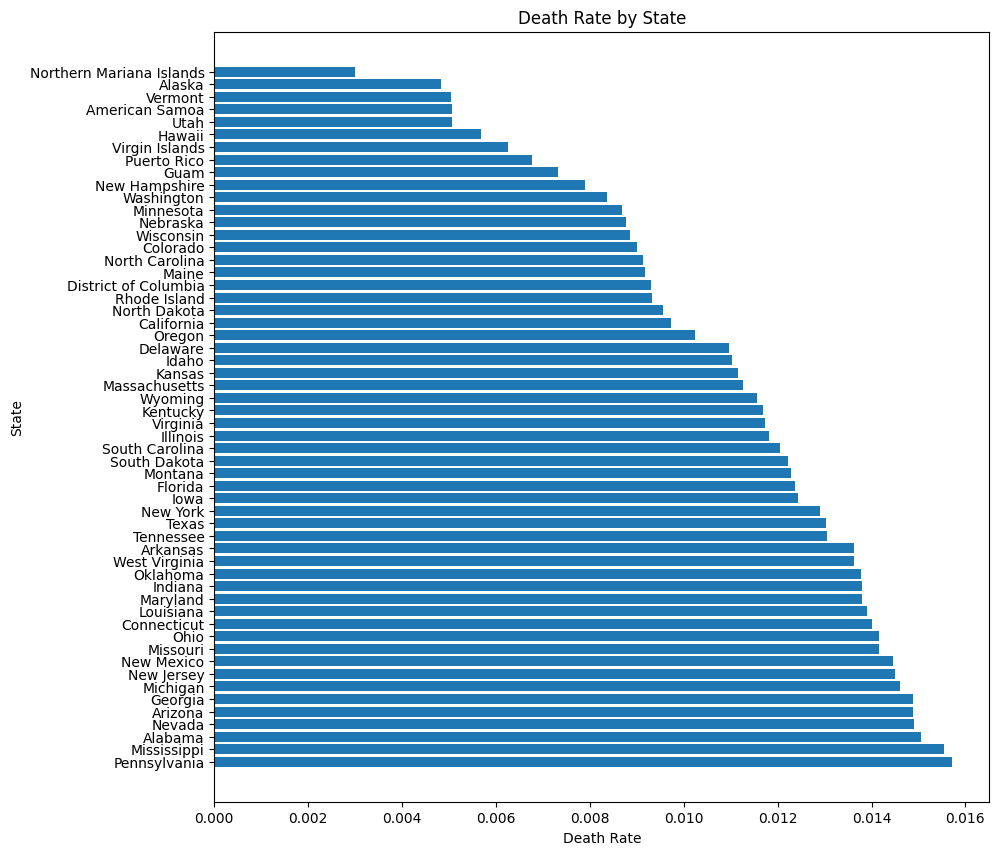

In [21]:
# Extra Credit 1 - Plot your death rate data!
import pandas as pd
import matplotlib.pyplot as plt

state_death_rate = spark.sql("""
    SELECT state,
           SUM(cases) AS total_cases,
           SUM(deaths) AS total_deaths,
           SUM(deaths)/SUM(cases) AS death_rate
    FROM covid
    WHERE date = (SELECT MAX(date) FROM covid)
    GROUP BY state
    ORDER BY death_rate DESC
""").toPandas()

plt.figure(figsize=(10, 10))
plt.barh(state_death_rate["state"], state_death_rate["death_rate"])
plt.xlabel("Death Rate")
plt.ylabel("State")
plt.title("Death Rate by State")
plt.show()